# Clustering

Clustering es un proceso de clasificación (o agrupamiento) no supervisado.

En los métodos más utilizados para clustering se destacan:
* Métodos por particiones (siendo K-means uno de ellos)
* Métodos basados en densidad (siendo DBSCAN uno de ellos)
* Métodos de agrupamiento jerárquico -Hierarchical Clustering- (Single-link and complete-link clustering)

En este notebook se usarán los métodos K-means y DBSCAN. 

+ **K-means** es un algoritmo que agrupa objetos en k grupos basándose en sus características. El agrupamiento se hace minimizando la suma de distancias entre cada objeto y el centroide de su grupo o cluster. Se suele usar la distancia cuadrática.

Pasos de K-means:

1. Inicialización: una vez escogido el número de grupos (k), se establecen k centroides en el espacio de los datos, por ejemplo, por selección aleatoria.
1. Asignación objetos a los centroides: cada objeto de los datos es asignado a su centroide más cercano.
1. Actualización centroides: se actualiza la posición del centroide de cada grupo tomando como nuevo centroide la posición del promedio de los objetos pertenecientes a dicho grupo.

[Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) de K-means

+ **DBSCAN** (Density-based spatial clustering of applications with noise): un cluster es una región densa de puntos, separada de regiones poco densas, y de otras regiones densas. Los métodos basados en densidad son útiles cuando los clusters tienen formas irregulares, están entrelazados o hay ruido (outliers) en los datos. Estos métodos identifican clusters de formas arbitrarias. Los puntos son clasificados en Core (cluster), Border (frontera) y noise (ruido/outliers). A diferencia de K-means, DBSCAN no necesita de la especificación del número de clusters.

[Ejemplo/documentación](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html) de DBSCAN.

Práctica:

Se hace generación de datasets sintéticos con las funciones de Scikit-learn. Estos datos vienen con una etiqueta asociada que indica a qué cluster pertenecen. La idea es usar clustering por K-means y DBSCAN para identificar los clusters sin conocer la etiqueta.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

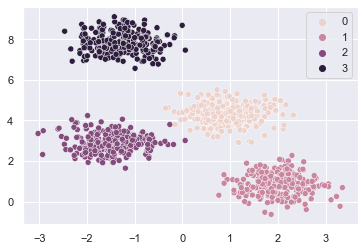

In [2]:
from sklearn.datasets import make_blobs, make_moons

X1, y1 = make_blobs(n_samples=1000, centers=4, cluster_std=0.5, n_features=2, random_state=0)
X2, y2 = make_blobs(n_samples=1000, centers=4, cluster_std=1, n_features=2, random_state=0)
X3, y3 = make_moons(n_samples=1000, noise=.05, random_state=0)

# Gráfico
sns.scatterplot(x = X1[:,0], y = X1[:,1], hue = y1)
plt.show()

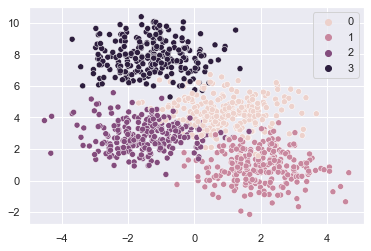

In [3]:
sns.scatterplot(x = X2[:,0], y = X2[:,1], hue = y2)
plt.show()

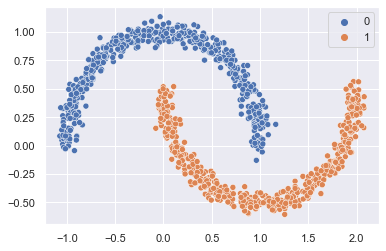

In [4]:
sns.scatterplot(x = X3[:,0], y = X3[:,1], hue = y3)
plt.show()

## Aplicación de K-means

In [5]:
from sklearn.cluster import KMeans

# Especificamos el número adecuado de clusters en cada caso
kmeans_1 = KMeans(n_clusters=4, random_state=0)
kmeans_2 = KMeans(n_clusters=4, random_state=0)
kmeans_3 = KMeans(n_clusters=4, random_state=0)

In [6]:
# Entrenar los modelos. No se pasan las etiquetas, solo los atributos.
kmeans_1.fit(X1)
kmeans_2.fit(X2)
kmeans_3.fit(X3)

KMeans(n_clusters=4, random_state=0)

Consulta de etiquetas y centros

In [7]:
etiquetas_1 = kmeans_1.labels_
print(etiquetas_1.shape)

(1000,)


In [8]:
centros_1 = kmeans_1.cluster_centers_
print(centros_1)

[[-1.27283855  7.84651464]
 [ 2.01942692  0.87474842]
 [-1.49807428  2.90164881]
 [ 0.92917513  4.29023124]]


In [9]:
etiquetas_2 = kmeans_2.labels_
centros_2 = kmeans_2.cluster_centers_
etiquetas_3 = kmeans_3.labels_
centros_3 = kmeans_3.cluster_centers_

Gráficos de los resultados

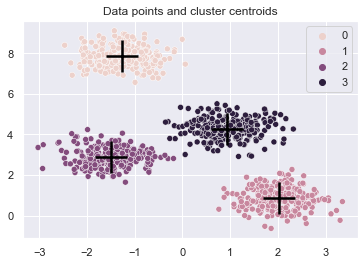

In [10]:
import warnings
warnings.filterwarnings("ignore")

sns.scatterplot(X1[:, 0], X1[:, -1], hue = etiquetas_1)
sns.scatterplot(centros_1[:, 0], centros_1[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

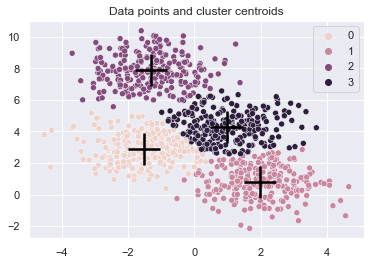

In [11]:
sns.scatterplot(X2[:, 0], X2[:, -1], hue = etiquetas_2)
sns.scatterplot(centros_2[:, 0], centros_2[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

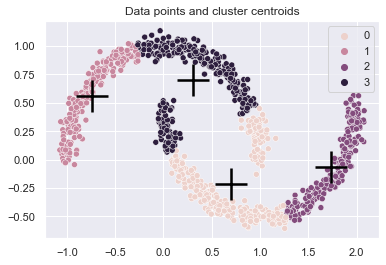

In [12]:
sns.scatterplot(X3[:, 0], X3[:, -1], hue = etiquetas_3)
sns.scatterplot(centros_3[:, 0], centros_3[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

Matriz de confusión

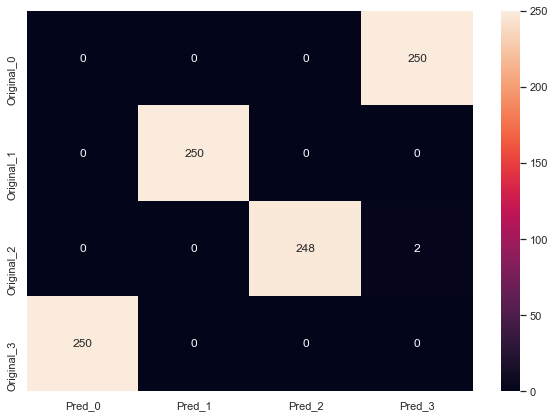

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1, etiquetas_1)
df_cm = pd.DataFrame(cm, index = [i for i in ['Original_0','Original_1','Original_2','Original_3']],
                  columns = [i for i in ['Pred_0','Pred_1','Pred_2','Pred_3']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="d");

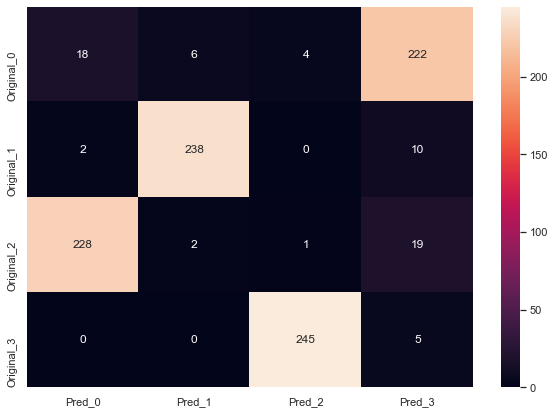

In [14]:
cm = confusion_matrix(y2, etiquetas_2)
df_cm = pd.DataFrame(cm, index = [i for i in ['Original_0','Original_1','Original_2','Original_3']],
                  columns = [i for i in ['Pred_0','Pred_1','Pred_2','Pred_3']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="d");

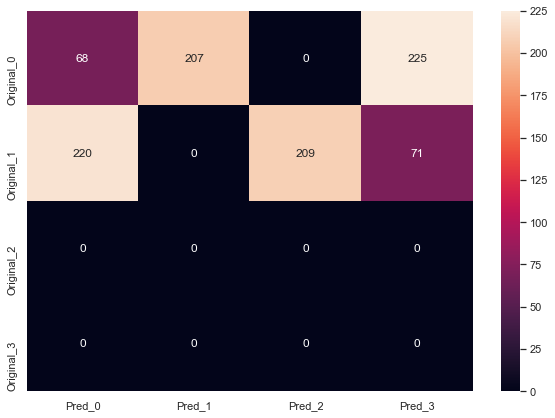

In [15]:
cm = confusion_matrix(y3, etiquetas_3)
df_cm = pd.DataFrame(cm, index = [i for i in ['Original_0','Original_1','Original_2','Original_3']],
                  columns = [i for i in ['Pred_0','Pred_1','Pred_2','Pred_3']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="d");

## Aplicación de DBSCAN

In [16]:
# Definición de modelos
from sklearn.cluster import DBSCAN

# En este paso hay que definir epsilon y min_samples, los parámetros del método.
db_1 = DBSCAN(eps=0.3, min_samples=10)
db_2 = DBSCAN(eps=0.3, min_samples=10)
db_3 = DBSCAN(eps=0.3, min_samples=10)

In [17]:
# Entrenar los modelos. No se pasan las etiquetas, solo los atributos.
db_1.fit(X1)
db_2.fit(X2)
db_3.fit(X3)

DBSCAN(eps=0.3, min_samples=10)

Consulta de etiquetas

La consulta se realiza usando `labels_`. Tener en cuenta que cuando el label es igual a '-1' quiere decir que esa instancia fue considerada ruido. 

In [18]:
# Consultamos las etiquetas
labels_1 = db_1.labels_

# Número de clusters en labels (sin contar ruido).
n_clusters_1 = len(set(labels_1)) - (1 if -1 in labels_1 else 0)
n_noise_1 = list(labels_1).count(-1)

print('Número estimado de clusters: %d' % n_clusters_1)
print('Número estimado de instancias de ruido: %d' % n_noise_1)

Número estimado de clusters: 4
Número estimado de instancias de ruido: 64


Gráfico

Se utiliza una función que genera el gráfico con distintos colores para cada cluster. Adicional, en gris los datos que se consideran ruido (noise), y además en tamaño más grande las instancias que son CORES.

In [19]:
def plot_DBSCAN(X1,labels_1,db_1,n_clusters_1):
    # Máscara con unos en los datos que son CORES
    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool)
    core_samples_mask_1[db_1.core_sample_indices_] = True
    # Graficar resultados

    # Se quita el negro y se deja solo para ruido.
    unique_labels = set(labels_1)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Usar negro para ruido
            col = [0, 0, 0, 1]

        class_member_mask = (labels_1 == k)

        xy = X1[class_member_mask & core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X1[class_member_mask & ~core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.title('Estimated number of clusters: %d' % n_clusters_1)
    plt.show()
    return

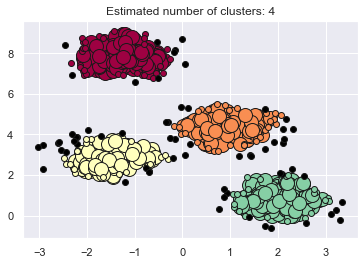

In [20]:
# Graficar
plot_DBSCAN(X1,labels_1,db_1,n_clusters_1)

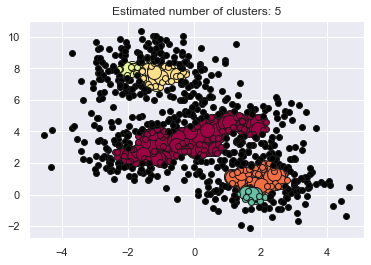

In [21]:
# Ahora para dataset 2

# Consultamos las etiquetas
labels_2 = db_2.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_2 = len(set(labels_2)) - (1 if -1 in labels_2 else 0)
n_noise_2 = list(labels_2).count(-1)

plot_DBSCAN(X2,labels_2,db_2,n_clusters_2)

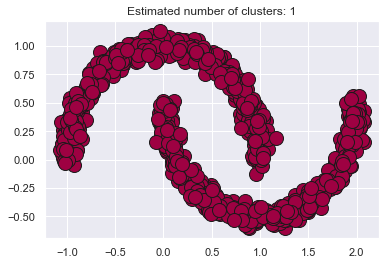

In [22]:
# Ahora para el dataset 3

# Consultamos las etiquetas
labels_3 = db_3.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_3 = len(set(labels_3)) - (1 if -1 in labels_3 else 0)
n_noise_3 = list(labels_3).count(-1)

plot_DBSCAN(X3,labels_3,db_3,n_clusters_3)

**Para profundizar:** en los casos con oportunidad de mejora se sugiere ajustar los parámetros `epsilon` y `min_dist` para lograr un resultado lo más parecido al dataset original posible.

## Métricas y evaluación para clustering

Referencia basada en los [apuntes](https://disi.unal.edu.co/~eleonguz/cursos/mda/presentaciones/validacion_Clustering.pdf) de la Prof. Elizabeth León Guzmán, Ph.D.

+ **Validación externa:** se usa información que no es producto de la técnica de clustrización. Ejemplo: los labels de las clases.
1. Con ellos se puede contruir una matriz de confusión y generar sus métricas derivadas (precisión, recall, etc.).
1. Entropía: verifica la pertenencia de los datos a los clústers. Evalúa clúster con más características en común (menor valor de entropía). La entropía permite medir la heterogeneidad de los clusters.
1. Pureza: que un clúster contenga solo una clase entre sus datos.

+ **Validación interna:** se usa información producto de la técnica de clusterización.
1. Cohesión: un miembro de cada clúster debe ser lo más cercano posible a los otros miembros del mismo cluster. Esto es distancia promedio de un punto x a todos los demás puntos en el mismo cluster.
1. Separación: los clusters deben estar ampliamente separados entre ellos. Existen varios enfoques para medir esta distancia entre clusters: distancia entre el miembro más cercano, distancia entre los miembros más distantes, o la distancia entre los centroides. Ejemplo: Distancia entre el miembro más cercano: distancia promedio de x a todos los demás puntos en el clúster más cercano.

Otros índices internos:
1. Índice Davies-Bouldin (DB): valores pequeños para el índice DB indica clusters compactos, y
cuyos centros estas bien separados los unos de los otros. Consecuentemente el número de clusters que minimiza el índice DB se toma como el óptimo.
1. Coeficiente de Silhouette: busca establecer el número óptimo de agrupamientos. Esta métrica de cohesión permite identificar cuán similar es un objeto a su propio cúmulo (cohesión) en comparación con otros cúmulos (separación). La silueta va de -1 a 1. Un valor alto indica que el objeto está bien emparejado con su propio cúmulo y mal emparejado con los cúmulos vecinos. Si la mayoría de los objetos tienen un valor alto, entonces la configuración del cúmulo es apropiada. Si muchos puntos tienen un valor bajo o negativo, entonces la configuración de cúmulos puede tener demasiados o muy pocos cúmulos.

## Selección del número óptimo de Clusters

Tomado de los [apuntes](https://jarroba.com/seleccion-del-numero-optimo-clusters/) de Ricardo Moya, Ph.D.

Uno de los problemas al aplicar alguno de los métodos de Clustering (K-means o EM) es la elección del número óptimo de Clusters. No existe un criterio objetivo ni ampliamente válido para esto. Sin embargo, una mala elección del número puede generar agrupaciones de datos muy heterogéneos (pocos Clusters), o datos, que siendo muy similares unos a otros, queden agrupados en clusters diferentes (muchos Clusters).

Como alternativa a un criterio objetivo para la selección del número de clusters se han implementado diferentes métodos: el método del codo (elbow method), el criterio de Calinsky, el Affinity Propagation (AP), el Gap (también con su versión estadística), Dendrogramas, etc.

## Ejemplo con Iris dataset

In [3]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

iris = load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
x = iris.iloc[:, [0, 1, 2, 3]].values

In [5]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Vamos a buscar el número óptimo de clusters para la clasificación con K-means.

C:\Users\usuario\anaconda3\envs\data science\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


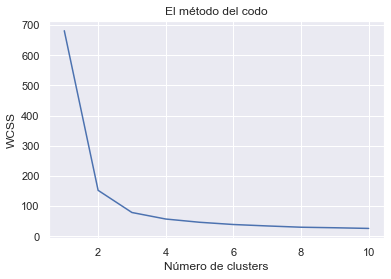

In [6]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

plt.plot(range(1, 11), wcss)
plt.title('El método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

Aplicación de K-means al dataset.

In [7]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

Representación gráfica

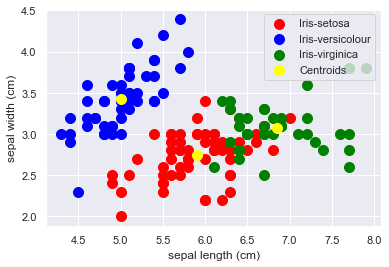

In [13]:
# Visualización de los clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

# Visualización de los centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend();

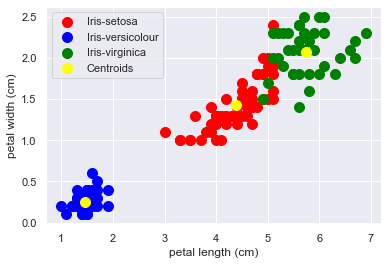

In [12]:
# Visualización de los clusters
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Iris-virginica')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

# Visualización de los centroides
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 100, c = 'yellow', label = 'Centroids')

plt.legend();

## Bonus: compresión de imagen usando K-means

En lugar de usar todos los colores posibles (combinaciones de 0 a 255 de los tres valores de Red Blue y Green), se usa una cantidad limitada elegida mediante un algoritmo de clustering.

Explicación: Se toman como datasets todos los pixeles, y se ponen en el espacio de los tres valores de R G y B. Luego se hace clustering con K-means. En lugar de usar la escala de 0 a 255 en RGB para representar la imagen, se toman los valores de los K centroides. El argumento de este método es que pixeles cercanos en la foto tendrán valores muy parecidos de RGB, con cambios mínimos. Ejemplo; de haber una pared blaca en el fondo, todos los pixeles correspondientes a esa pared estaran muy cerca del (255,255,255) que es el Blanco puro en RGB. En lugar de usar un valor distinto para cada uno de estos pixeles, usamos un unico valor para definir el color de todos ellos.

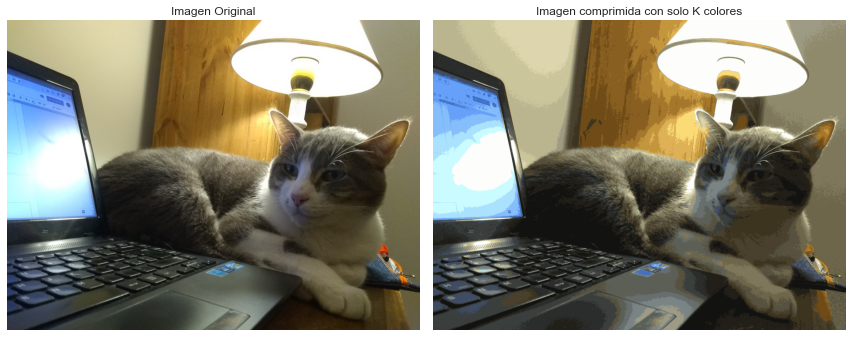

In [57]:
from matplotlib.image import imread

# Lectura de la imagen inicial
img = imread('domo_despierto.jpeg')
img_size = img.shape

# Definición del numero de clusters (colores) a usar
K= 30

# Cambio de dimensiones para que queden como instancias (filas) los pixeles
# y como features (columnas) el valor correspondiente a Red, Green, Blue de cada uno.
X = img.reshape(img_size[0] * img_size[1], img_size[2])

# Se corre el algoritmo de clustering
km = KMeans(n_clusters=K)
km.fit(X)

# Se usan los centroides para comprimir la imagen

# Nuevo X donde en lugar de valores cualquiera en RGB se pone alguno de los K clusters
X_compressed = km.cluster_centers_[km.labels_]

# Verificación que los valores esten en la unidad y el rango correcto para una imagen jpg
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

# Se lleva la imagen a la forma original que debe tener
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

# Gráfico de las imagenes (una al lado de la otra)
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Imagen Original')
ax[1].imshow(X_compressed)
ax[1].set_title('Imagen comprimida con solo K colores')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();

In [59]:
# Guardar la imagen
from PIL import Image
im = Image.fromarray(X_compressed)
im.save("your_file.jpeg")

Otras referencias

+ [Three popular clustering methods and When to use each](https://medium.com/predict/three-popular-clustering-methods-and-when-to-use-each-4227c80ba2b6)